In [1]:
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class StepCounter:
    def __init__(self):
        self.steps = 0

    def increment(self):
        self.steps += 1

    def reset(self):
        self.steps = 0

def step_counter_decorator(func):
    def wrapper(*args, **kwargs):
        step_counter = kwargs.get('step_counter')
        if step_counter is None:
            step_counter = StepCounter()
            kwargs['step_counter'] = step_counter
        return func(*args, **kwargs)
    return wrapper

In [3]:
# Function to compute steps and estimate complexity
def compute_steps_and_complexity(func, inputs, trials=10):
    step_data = defaultdict(list)

    for inp in inputs:
        total_steps = 0
        for _ in range(trials):  # Perform multiple trials
            step_counter = StepCounter()
            step_counter.reset()
            
            # Call the function with step counter
            func(inp, step_counter=step_counter)
            
            total_steps += step_counter.steps
        
        avg_steps = total_steps / trials  # Take the average over trials
        step_data["input_size"].append(inp)
        step_data["steps"].append(avg_steps)
    
    # Plotting steps vs input size
    input_sizes = np.array(step_data["input_size"])
    steps = np.array(step_data["steps"])
    
    plt.plot(input_sizes, steps, label="Steps vs Input Size", marker="o")
    plt.xlabel("Input Size")
    plt.ylabel("Steps")
    plt.title("Empirical Time Complexity")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Estimate time complexity based on step data
    complexities = {
        "O(n)": input_sizes,
        "O(n^2)": input_sizes**2,
        "O(2^n)": 2**input_sizes,
        "O(n^3)": input_sizes**3,
        "O(log n)": np.log(input_sizes + 1e-10),
        "O(n log n)": input_sizes * np.log(input_sizes + 1e-10),
    }

    errors = {}
    for complexity_name, values in complexities.items():
        error = np.sum((steps - values)**2)
        errors[complexity_name] = error
    
    best_fit_complexity = min(errors, key=errors.get)
    return step_data, best_fit_complexity

In [4]:
@step_counter_decorator
def fat(n, step_counter=None):
    prod = 1
    for i in range(2, n+1):
        prod = prod * i
        step_counter.increment()
    return prod

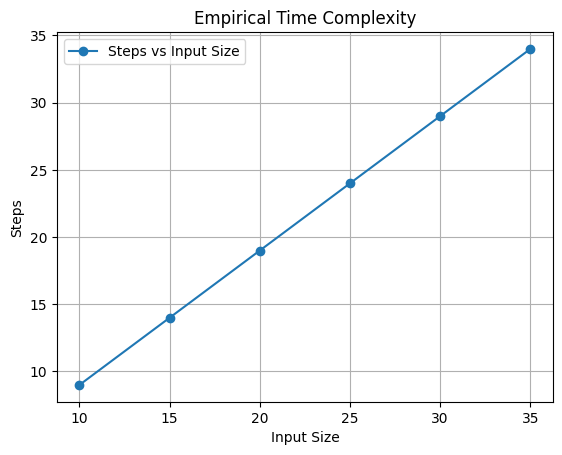

Estimated Time Complexity for Fatorial: O(n)


In [5]:
# Test with recursive Fibonacci
inputs = range(10, 40, 5)  # Example input sizes for Fibonacci
steps_data, complexity = compute_steps_and_complexity(fat, inputs, 1)
print(f"Estimated Time Complexity for Fatorial: {complexity}")